In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitute combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-79.06929988357231, -13.945221747012795),
 (-18.53389915871847, 131.11219075200535),
 (-68.25402098188471, -51.2313323109976),
 (77.9943685872554, -34.40655350752485),
 (-40.22294111046397, 42.599567027335496),
 (85.54340272148545, -68.20864442917002),
 (89.7343032679924, 101.69730495934556),
 (-46.6420986600936, -30.05538611096634),
 (77.07665391184273, 111.22610827381351),
 (8.502457893571517, -117.1091703360668),
 (-60.80102470521109, 87.36814114820749),
 (20.913576064928577, -177.8825274445937),
 (71.95358142483758, 8.138925126372612),
 (52.48263168814094, -74.33528389271703),
 (40.19165284851417, 19.91509720244619),
 (-74.6806261670026, 151.3382458538104),
 (-6.250374659107834, 13.70044896337751),
 (-24.6763958157256, -109.32529706765074),
 (-34.14120200191398, 92.44425816309166),
 (59.11248368312806, 134.80784993813757),
 (-68.71681861972776, -82.5878942879742),
 (-61.01895938484671, 88.93265201201388),
 (-89.60740035030689, -163.7605336911133),
 (-82.73529360762464, -6.4064280

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
cities

['cape town',
 'kununurra',
 'ushuaia',
 'tasiilaq',
 'tsihombe',
 'qaanaaq',
 'khatanga',
 'cidreira',
 'saskylakh',
 'cabo san lucas',
 'busselton',
 'kapaa',
 'sorland',
 'chapais',
 'tepelene',
 'hobart',
 'matadi',
 'rikitea',
 'geraldton',
 'ust-maya',
 'punta arenas',
 'mataura',
 'hermanus',
 'belushya guba',
 'hamilton',
 'east london',
 'mlonggo',
 'valleyview',
 'port elizabeth',
 'klaksvik',
 'hasaki',
 'illoqqortoormiut',
 'cururupu',
 'vaini',
 'saryshagan',
 'bundaberg',
 'palu',
 'coatzintla',
 'ngukurr',
 'thompson',
 'hilo',
 'talnakh',
 'port hedland',
 'san cristobal',
 'bethel',
 'dingle',
 'asau',
 'cubuk',
 'nizhneyansk',
 'matara',
 'byron bay',
 'upernavik',
 'half moon bay',
 'arraial do cabo',
 'albany',
 'ballia',
 'saint-pierre',
 'aberdeen',
 'artyk',
 'ambon',
 'carnarvon',
 'matanzas',
 'ust-kuyga',
 'coihaique',
 'concordia',
 'luderitz',
 'yazd',
 'grand gaube',
 'taolanaro',
 'paamiut',
 'bairiki',
 'san carlos de bariloche',
 'williamsburg',
 'karwar

In [7]:
import requests
requests.__version__

'2.22.0'

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime



In [9]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d132834ac529acaa005effd9c0b5236


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginningof the logging.
print("Beginning Data Retrieval      ")
print("------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} |  {city}")
    # Add 1 to the record count.
    record_count += 1
    
        # Run an AP request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})

    # If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass

    
# Indicate that Data Loading is complete.
print('----------------------------------')
print('Data Retrieval Complete           ')
print('----------------------------------')

Beginning Data Retrieval      
------------------
Processing Record 1 of Set 1 |  cape town
Processing Record 2 of Set 1 |  kununurra
Processing Record 3 of Set 1 |  ushuaia
Processing Record 4 of Set 1 |  tasiilaq
Processing Record 5 of Set 1 |  tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 |  qaanaaq
Processing Record 7 of Set 1 |  khatanga
Processing Record 8 of Set 1 |  cidreira
Processing Record 9 of Set 1 |  saskylakh
Processing Record 10 of Set 1 |  cabo san lucas
Processing Record 11 of Set 1 |  busselton
Processing Record 12 of Set 1 |  kapaa
Processing Record 13 of Set 1 |  sorland
Processing Record 14 of Set 1 |  chapais
Processing Record 15 of Set 1 |  tepelene
Processing Record 16 of Set 1 |  hobart
Processing Record 17 of Set 1 |  matadi
Processing Record 18 of Set 1 |  rikitea
Processing Record 19 of Set 1 |  geraldton
Processing Record 20 of Set 1 |  ust-maya
Processing Record 21 of Set 1 |  punta arenas
Processing Record 22 of Set 1 |  mataura
Proce

City not found. Skipping...
Processing Record 34 of Set 4 |  turukhansk
Processing Record 35 of Set 4 |  mackay
Processing Record 36 of Set 4 |  venice
Processing Record 37 of Set 4 |  bilma
Processing Record 38 of Set 4 |  butaritari
Processing Record 39 of Set 4 |  arauco
Processing Record 40 of Set 4 |  grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 |  boyolangu
Processing Record 42 of Set 4 |  tuktoyaktuk
Processing Record 43 of Set 4 |  vostok
Processing Record 44 of Set 4 |  saldanha
Processing Record 45 of Set 4 |  shingu
Processing Record 46 of Set 4 |  marigot
Processing Record 47 of Set 4 |  izhma
Processing Record 48 of Set 4 |  sorong
Processing Record 49 of Set 4 |  pevek
Processing Record 50 of Set 4 |  mayo
Processing Record 1 of Set 5 |  tapa
Processing Record 2 of Set 5 |  mergui
City not found. Skipping...
Processing Record 3 of Set 5 |  howard springs
Processing Record 4 of Set 5 |  galle
Processing Record 5 of Set 5 |  mbigou
Proces

Processing Record 21 of Set 8 |  phuket
Processing Record 22 of Set 8 |  sandnessjoen
Processing Record 23 of Set 8 |  westport
Processing Record 24 of Set 8 |  inuvik
Processing Record 25 of Set 8 |  vila do maio
Processing Record 26 of Set 8 |  svetlogorsk
Processing Record 27 of Set 8 |  daugai
Processing Record 28 of Set 8 |  tabiauea
City not found. Skipping...
Processing Record 29 of Set 8 |  wenling
Processing Record 30 of Set 8 |  erzin
Processing Record 31 of Set 8 |  yulara
Processing Record 32 of Set 8 |  wahran
City not found. Skipping...
Processing Record 33 of Set 8 |  tecpan
Processing Record 34 of Set 8 |  gornopravdinsk
Processing Record 35 of Set 8 |  saint-leu
Processing Record 36 of Set 8 |  ayan
Processing Record 37 of Set 8 |  opuwo
Processing Record 38 of Set 8 |  odessa
Processing Record 39 of Set 8 |  malakal
Processing Record 40 of Set 8 |  fortuna
Processing Record 41 of Set 8 |  tingi
Processing Record 42 of Set 8 |  prainha
Processing Record 43 of Set 8 |  

Processing Record 5 of Set 12 |  shevchenkove
Processing Record 6 of Set 12 |  linchuan
City not found. Skipping...
Processing Record 7 of Set 12 |  mumford
Processing Record 8 of Set 12 |  mount pleasant
Processing Record 9 of Set 12 |  valdosta
Processing Record 10 of Set 12 |  little current
Processing Record 11 of Set 12 |  shubarshi
Processing Record 12 of Set 12 |  de aar
Processing Record 13 of Set 12 |  caibarien
Processing Record 14 of Set 12 |  jabinyanah
Processing Record 15 of Set 12 |  bababe
City not found. Skipping...
Processing Record 16 of Set 12 |  baghdad
Processing Record 17 of Set 12 |  touros
Processing Record 18 of Set 12 |  ambodifototra
City not found. Skipping...
Processing Record 19 of Set 12 |  pregradnaya
Processing Record 20 of Set 12 |  chongwe
Processing Record 21 of Set 12 |  drezdenko
Processing Record 22 of Set 12 |  dobric
Processing Record 23 of Set 12 |  matay
Processing Record 24 of Set 12 |  taupo
Processing Record 25 of Set 12 |  shetpe
Processi

In [11]:
len(city_data)

570

In [12]:
# convert the array for of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,61.00,62,20,13.87,ZA,2020-12-02 01:56:18
1,Kununurra,-15.77,128.73,86.00,66,98,4.70,AU,2020-12-02 01:58:15
2,Ushuaia,-54.80,-68.30,37.40,94,40,17.22,AR,2020-12-02 01:57:40
3,Tasiilaq,65.61,-37.64,19.40,57,100,18.34,GL,2020-12-02 01:58:16
4,Qaanaaq,77.48,-69.36,-0.76,88,100,8.66,GL,2020-12-02 01:58:16
5,Khatanga,71.97,102.50,28.56,99,100,21.59,RU,2020-12-02 01:58:16
6,Cidreira,-30.18,-50.21,69.85,82,69,18.79,BR,2020-12-02 01:58:16
7,Saskylakh,71.92,114.08,13.33,96,97,5.84,RU,2020-12-02 01:58:16
8,Cabo San Lucas,22.89,-109.91,71.60,60,5,8.05,MX,2020-12-02 01:58:16
9,Busselton,-33.65,115.33,67.64,45,0,1.59,AU,2020-12-02 01:58:16


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-12-02 01:56:18,-33.93,18.42,61.00,62,20,13.87
1,Kununurra,AU,2020-12-02 01:58:15,-15.77,128.73,86.00,66,98,4.70
2,Ushuaia,AR,2020-12-02 01:57:40,-54.80,-68.30,37.40,94,40,17.22
3,Tasiilaq,GL,2020-12-02 01:58:16,65.61,-37.64,19.40,57,100,18.34
4,Qaanaaq,GL,2020-12-02 01:58:16,77.48,-69.36,-0.76,88,100,8.66
...,...,...,...,...,...,...,...,...,...
565,La Ronge,CA,2020-12-02 01:59:02,55.10,-105.28,30.20,74,100,2.24
566,Barra Patuca,HN,2020-12-02 01:59:02,15.80,-84.28,77.43,82,100,3.89
567,Igarka,RU,2020-12-02 01:59:02,67.47,86.58,9.93,95,100,16.80
568,Atambua,ID,2020-12-02 01:59:02,-9.11,124.89,88.32,54,17,3.67


In [14]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']



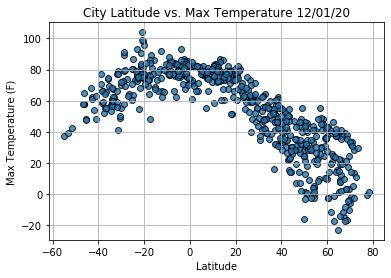

In [16]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

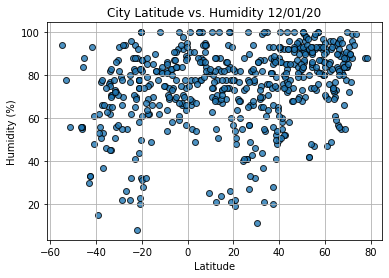

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure.
plt.savefig('weather_data/Fig2.png')
# Show plot.
plt.show()

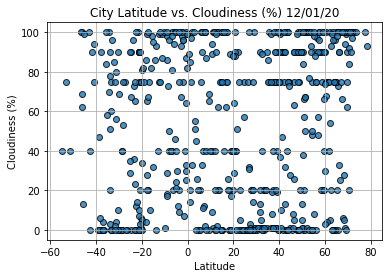

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig3.png')
# Show plot.
plt.show()

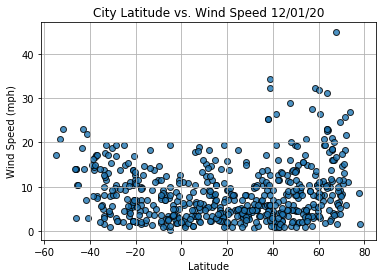

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig4.png')
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression no hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(r_value)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    
    

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Tepelene
Country                        AL
Date          2020-12-02 01:58:16
Lat                          40.3
Lng                         20.02
Max Temp                    46.99
Humidity                       92
Cloudiness                     37
Wind Speed                   1.99
Name: 13, dtype: object

In [22]:
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
northern_hemi_df

southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
southern_hemi_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-12-02 01:56:18,-33.93,18.42,61.00,62,20,13.87
1,Kununurra,AU,2020-12-02 01:58:15,-15.77,128.73,86.00,66,98,4.70
2,Ushuaia,AR,2020-12-02 01:57:40,-54.80,-68.30,37.40,94,40,17.22
6,Cidreira,BR,2020-12-02 01:58:16,-30.18,-50.21,69.85,82,69,18.79
9,Busselton,AU,2020-12-02 01:58:16,-33.65,115.33,67.64,45,0,1.59
...,...,...,...,...,...,...,...,...,...
537,Tartagal,AR,2020-12-02 01:58:59,-22.52,-63.80,75.43,69,100,4.16
538,Mgandu,TZ,2020-12-02 01:58:59,-5.95,34.13,62.31,91,94,2.44
553,Grootfontein,NA,2020-12-02 01:59:01,-19.57,18.12,70.83,28,82,5.44
562,Vredendal,ZA,2020-12-02 01:59:02,-31.67,18.50,55.85,72,0,4.56


-0.852966960909307


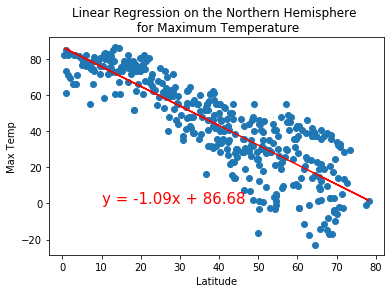

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

0.6075919879576323


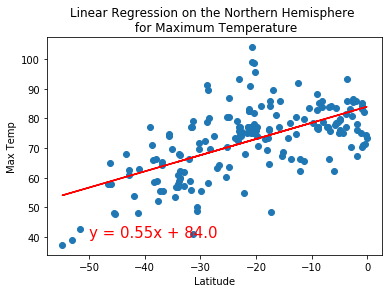

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,40))

0.23724046877162144


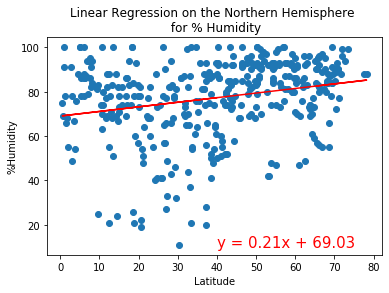

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '%Humidity', (40,10))

0.3005786977870695


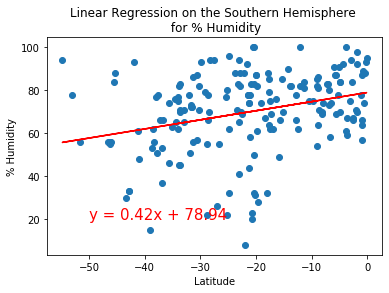

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50, 20))

0.225698739064747


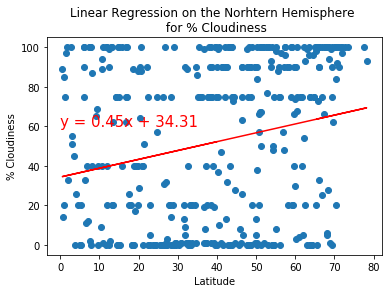

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Norhtern Hemisphere \n for % Cloudiness',
                      '% Cloudiness', (0, 60))

0.18703732588510505


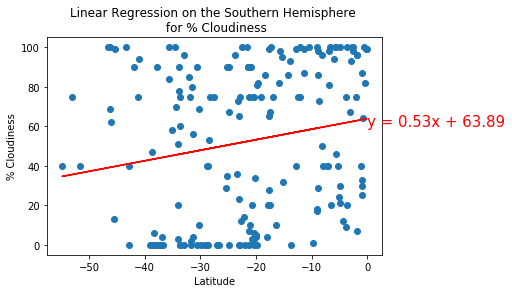

In [28]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                      '% Cloudiness', (0, 60))

0.2817209618525811


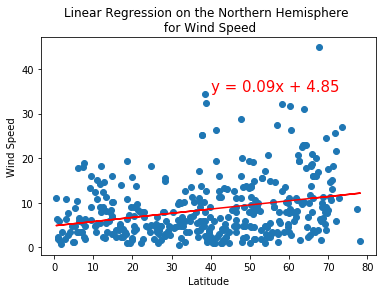

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                      'Wind Speed', (40,35))

-0.44784352531958743


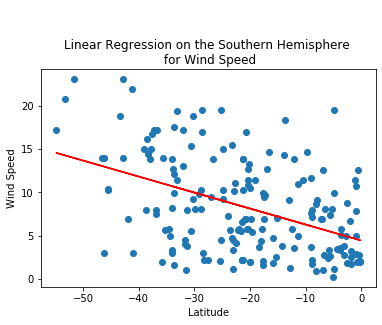

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                      'Wind Speed', (-50,30))